# 📘 Notebook: `02_training_classic.ipynb`

## Overview

This notebook focuses on **training, evaluating, and persisting a classic machine learning model** using the dataset generated in `01_data_generation.ipynb`.

The goal is to establish a **simple but solid baseline** using Logistic Regression.

This notebook covers:

1. Loading processed data
2. Feature/target separation
3. Train-test splitting
4. Model training
5. Model evaluation
6. Model persistence

## 1. Model Training Setup

This notebook focuses on training a classic machine learning baseline using the dataset generated previously.

We begin by:
- Loading the processed dataset
- Defining input features and the target variable
- Splitting the data into training and test sets

The test set represents unseen data and is used for final evaluation.

## 2. Model Training

A **Logistic Regression** classifier is used as a baseline model.

This algorithm is:
- Interpretable
- Efficient
- Well-suited for binary classification problems with linearly separable features

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. LOAD PROCESSED DATA ---
# Use the clean CSV generated in the previous step
df = pd.read_csv('../data/processed/fruits_dataset.csv')

# --- 2. FEATURE / TARGET SPLIT ---
# X: What the model "sees" (Weight, Skin Roughness)
# y: The correct answer (Is it an avocado? 1/0)
X = df[['weight_g', 'skin_roughness']]
y = df['is_avocado']

# --- 3. TRAIN / TEST SPLIT (Final Exam) ---
# test_size=0.2 -> Reserve 20% of the data for final evaluation
# random_state=42 -> Ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data: {X_train.shape[0]} fruits")
print(f"Test data: {X_test.shape[0]} fruits")

# --- 4. MODEL TRAINING (This is where the 'magic' happens) ---
# Logistic Regression is simple and efficient for binary classification problems
model = LogisticRegression()
print("Training model...")
model.fit(X_train, y_train)  # The model adjusts its internal weights here
print("Training completed!")

Training data: 795 fruits
Test data: 199 fruits
Training model...
Training completed!


### Dataset Split Summary

The dataset has been split into:
- **Training set**: Used to learn model parameters
- **Test set**: Reserved exclusively for evaluation

This separation ensures an unbiased assessment of model performance.

### Training Outcome

The model has successfully learned from the training data.

At this point:
- Internal parameters (weights) have been optimized
- The model is ready for evaluation on unseen data

## 3. Model Evaluation and Persistence

In this section, we evaluate model performance using the test set.

We also persist the trained model to disk so it can be reused in downstream applications such as APIs or batch inference pipelines.


Model Accuracy: 96.98%


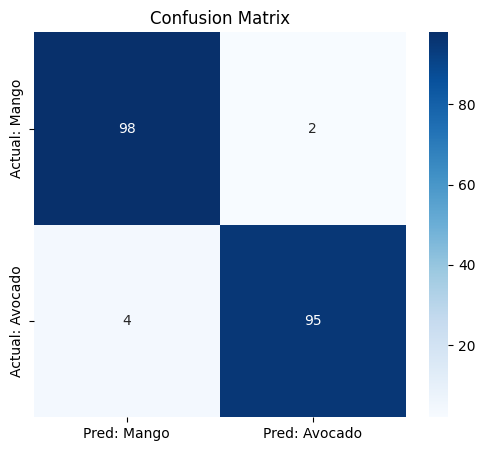

Model saved to 'src/models/fruit_classifier_v1.pkl'


In [4]:
# --- 5. FINAL EVALUATION (TEST SET) ---
# We ask the model to make predictions on data it has NEVER seen before
y_pred = model.predict(X_test)

# --- 6. METRICS ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# --- 7. CONFUSION MATRIX (ERROR VISUALIZATION) ---
# Shows how many mangos were confused with avocados and vice versa
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred: Mango', 'Pred: Avocado'],
    yticklabels=['Actual: Mango', 'Actual: Avocado']
)
plt.title('Confusion Matrix')
plt.show()

# --- 8. SAVE TRAINED MODEL ---
# In real-world scenarios, we save this file to use it later in an API or service
import joblib
import os

os.makedirs('../src/models', exist_ok=True)
joblib.dump(model, '../src/models/fruit_classifier_v1.pkl')
print("Model saved to 'src/models/fruit_classifier_v1.pkl'")


### Final Results

The trained model has been:
- Evaluated using accuracy and a confusion matrix
- Serialized and saved for future use

This concludes a complete classical machine learning pipeline:
data preparation → training → evaluation → persistence.